<a href="https://colab.research.google.com/github/averyjr161/CSST104-3B-2AY2627/blob/main/Malimutin_Lab1__CSST104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import geopandas as gpd
import folium

Libraries imported successfully ✅


        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

<Axes: >

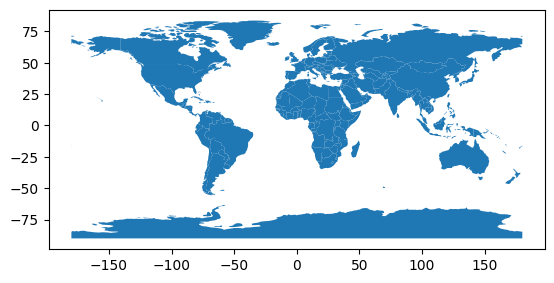

In [ ]:
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

print(world.head())
world.plot()

In [ ]:
print("Current CRS:", world.crs)

Current CRS: EPSG:4326


In [ ]:
world_projected = world.to_crs(epsg=3857)

world_projected["area_m2"] = world_projected.geometry.area

print(world_projected[["ADMIN", "area_m2"]].head())
print("\nArea Reprojection ✓ Complete")

                         ADMIN       area_m2
0                         Fiji  2.128334e+10
1  United Republic of Tanzania  9.522552e+11
2               Western Sahara  1.171023e+11
3                       Canada  5.216648e+13
4     United States of America  2.186228e+13

Area Reprojection ✓ Complete


In [ ]:
world_projected["centroid"] = world_projected.geometry.centroid
world_projected["x"] = world_projected.centroid.x
world_projected["y"] = world_projected.centroid.y

print(world_projected[["ADMIN", "x", "y"]].head())

                         ADMIN             x             y
0                         Fiji  1.824878e+07 -1.958098e+06
1  United Republic of Tanzania  3.869296e+06 -7.003071e+05
2               Western Sahara -1.348403e+06  2.794163e+06
3                       Canada -1.079779e+07  1.044422e+07
4     United States of America -1.329713e+07  6.667416e+06


**TASK2:**

1.The dataset contains 169 columns.

2.The dataset contains Polygon and MultiPolygon geometries.

3.The geometry column represents the spatial boundaries (shapes) of each country.

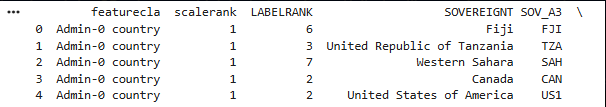

**TASK3:**

1.EPSG:4326 represents the WGS84 geographic coordinate system using latitude and longitude in degrees.


2.CRS ensures that spatial data is correctly located and measurements (like distance and area) are accurate.

**TASK4:**

1.Because it uses degrees (not meters), which are not suitable for accurate area calculations.

2.EPSG:3857 is based on meters.

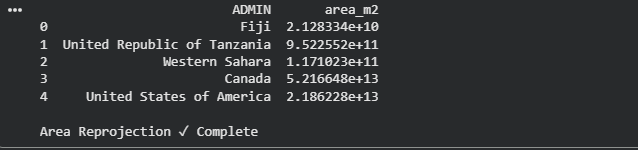

**TASK5:**

1.A centroid is the geometric center of a shape, representing the average position of all the points that make up that object's boundary.

2.In clustering, centroids serve as the representative location for an entire region, allowing algorithms like K-Means to group neighboring countries or areas based on the physical distance between their center points.

3.We extract X (Longitude) and Y (Latitude) separately because most machine learning models and plotting functions require these as individual numerical features (columns) rather than a combined geometry object.

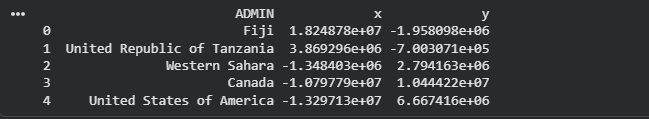

**REFLECTION:**

During this lab, one difficulty I encountered was understanding how Coordinate Reference Systems (CRS) affect spatial data analysis. At first, it was confusing why area calculations were incorrect using EPSG:4326. However, after reprojecting to a metric CRS (EPSG:3857), I understood the importance of using the correct coordinate system. I learned that spatial data depends heavily on CRS for accurate measurements and analysis. I also realized how centroids and area features can be useful for machine learning tasks like clustering.
